## Bootstrapping

Bootstrapping in statistics means *Sampling with replacment.* Flipping a coin and rolling a die are kind of like bootstrap sampling as well, as rolling a 6 in one scenario doesn't mean that 6 is less likely later.

Random.choice in python samples in this way.

For example if we have:

    population = np.array([1,0,0,0,0,1,1])
    
We are get a random sample with replacement by calling:

    np.random.choice(population, size=7)
    
This could give us something like: [0,1,1,1,0,0,1]

Note that the number of 1's is different from the original sample as it is sampling with replacement 1 by 1.

In a standard bootstrap, a bootstrapped sample means drawing points from the original data with replacement until we get as many points as there were in the original data. By considering a lot of samples we cam make estimates of the sampling distribution of some of the original populations sampling statistics. 

In the example below, we want to create a 95% confidence interval for the 90th percentile from a dataset of 5000 data points. (Perhaps we're looking at website load times and want to reduce the worst cases.) Bootstrapping makes this easy to estimate. First of all, we take a bootstrap sample (i.e., draw 5000 points with replacement from the original data), record the 90th percentile, and then repeat this a large number of times, let's say 100 000. From this bunch of bootstrapped 90th percentile estimates, we form our confidence interval by finding the values that capture the central 95% of the estimates (cutting off 2.5% on each tail). 


In [45]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
data = pd.read_csv('data/bootstrapping_data.csv')
data.head(10)

,time
0,8152
1,2082
2,3049
3,3317
4,813
5,1442
6,3815
7,2113
8,738
9,2499


Text(0.5, 1.0, 'Distribution in the original sample')

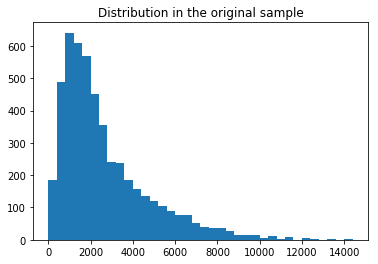

In [24]:
# data visualization
plt.hist(data['time'], bins = np.arange(0, data['time'].max()+400, 400));
plt.title("Distribution in the original sample")

In [51]:
percentile = 90
n_trials = 10000
confidence_interval = 0.95

In [54]:
n_points = data.shape[0]
sample_percentiles = []

for _ in range(n_trials):
    # draw a random sample from the data with replacement, each with the same number of points as the original
    sample = np.random.choice(data['time'], n_points, replace = True)

    # compute the desired percentile...
    sample_percentile = np.percentile(sample, percentile)

    # and add the value to the list of sampled percentile
    sample_percentiles.append(sample_percentile)


# Compute the confidence interval bounds
lower_limit = np.percentile(sample_percentiles, (1 - confidence_interval)/2 * 100)
upper_limit = np.percentile(sample_percentiles, (1 + confidence_interval)/2 * 100)

Text(0.5, 1.0, 'Histogram of the 90th Percentile ')

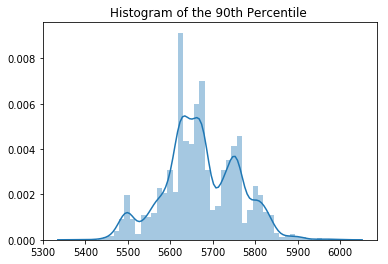

In [57]:
ax = sns.distplot(sample_percentiles, kde=True, norm_hist=True  )
ax.set_title("Histogram of the 90th Percentile ")

*TODO: I'm surprised to see that the distribution of the 90th percentiles of the samples is not normally distributed. Is this naive of me? Post on the Udacity Forum to to get some feedback.*

In [56]:
print("Lower bound is:", lower_limit)
print("Upper bound is:", upper_limit)

Lower bound is: 5495.200000000001
Upper bound is: 5833.4000000000015


*I have further notes on bootstrapping in my google doc 'Experiment Design'*